In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# this module is for working with dates on charts
import matplotlib.dates as mdates 
from datetime import timedelta

sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('df_report_conv_weekly.csv')
df1 = df[df['week_date'] == df['week_date'].min()]
# this way i can make existing column an index 
df1 = df1.drop(['addedToCart', 'conv'], axis=1).set_index('deviceCategory')
df1

,week_date,uniq_users
deviceCategory,,
desktop,2016-08-01 00:00:00+00:00,10983
mobile,2016-08-01 00:00:00+00:00,2146
tablet,2016-08-01 00:00:00+00:00,354


<Axes: ylabel='uniq_users'>

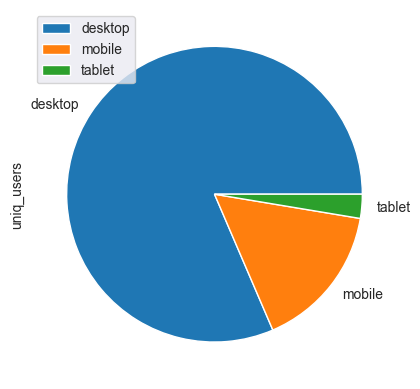

In [27]:
df1.plot.pie(y='uniq_users')

<Axes: ylabel='uniq_users'>

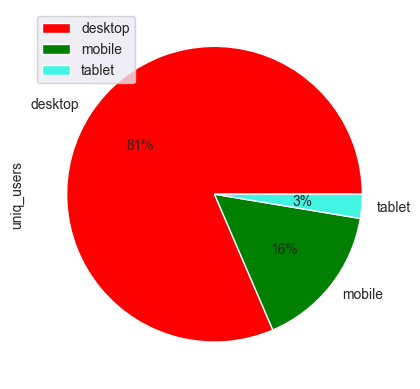

In [28]:
# i can customize pie chart
# autopct = '%1.0f%%' -- is for adding % to the chart
df1.plot.pie(y='uniq_users', autopct='%1.0f%%', colors=['red', 'g', '#42f5e3'])

In [33]:
df['week_date'] = pd.to_datetime(df['week_date']) 
df.dtypes

week_date         datetime64[ns, UTC]
deviceCategory                 object
uniq_users                      int64
addedToCart                   float64
conv                          float64
dtype: object

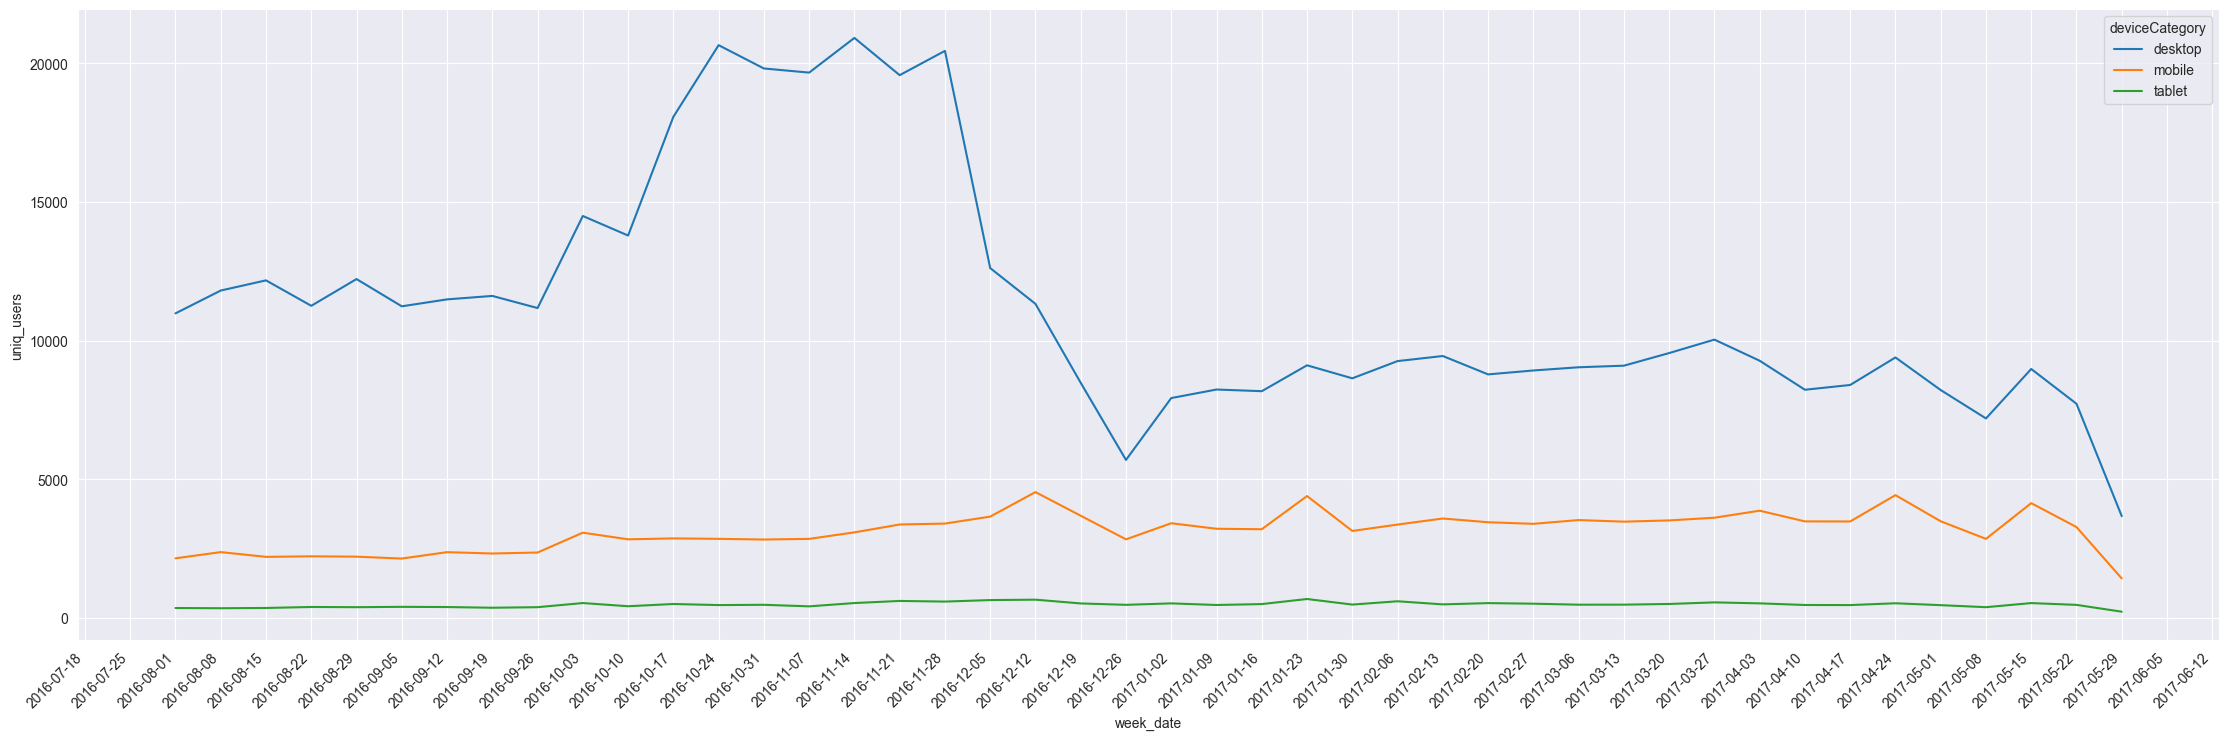

In [52]:
plt.figure(figsize=(22, 7))
# changes ticks (dates in this case)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

ax = sns.lineplot(df, x='week_date', y='uniq_users', hue='deviceCategory')
# added full date of the week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))


In [54]:
# i want to make 3 charts -- before spike, with spike and after it
def get_dataset_by_date(df, date):
    dfx = df[df['week_date'] == date]
    return dfx.set_index('deviceCategory')

def get_dataset_by_category(df, cat):
    dfx = df[df['deviceCategory'] == cat]
    return dfx.set_index('deviceCategory')

In [55]:
# here im making these dataframes
df_before = get_dataset_by_date(df, '2016-09-05')
df_with = get_dataset_by_date(df, '2016-11-07')
df_after = get_dataset_by_date(df, '2017-03-13')

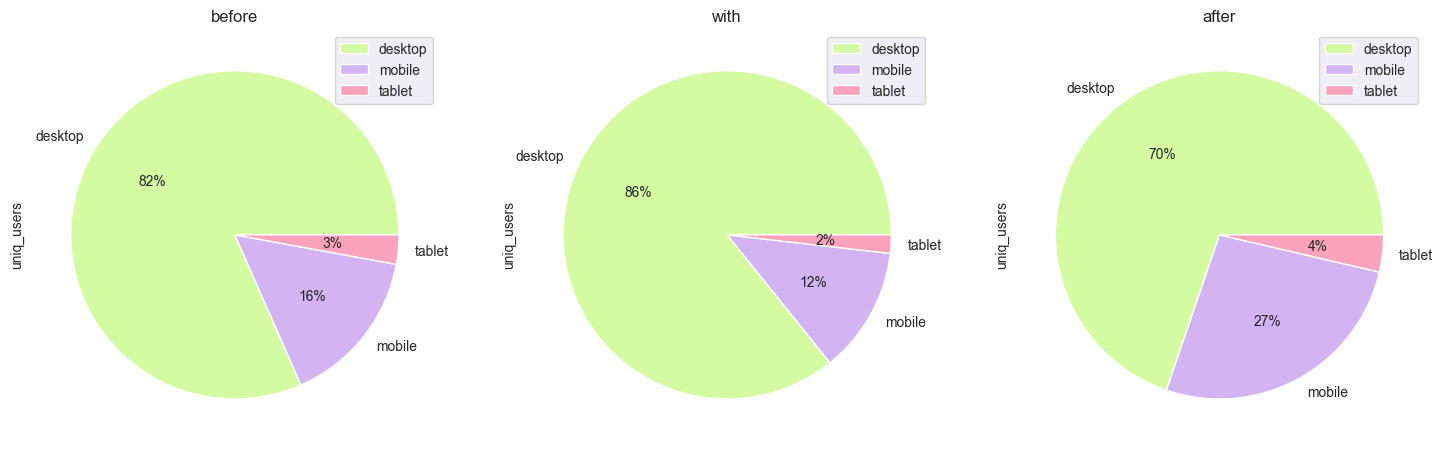

In [82]:
# here is how i can create multiple charts in one
figure, axis = plt.subplots(1, 3, figsize=(18, 6))

df_before.plot.pie(y='uniq_users', autopct='%1.0f%%', colors = ['#d4faa2', '#d3b3f2', '#faa2be'], ax=axis[0])
axis[0].set_title('before') # this is how i can give specific name for subchart

df_with.plot.pie(y='uniq_users', autopct='%1.0f%%', colors = ['#d4faa2', '#d3b3f2', '#faa2be'], ax=axis[1])
axis[1].set_title('with')

df_after.plot.pie(y='uniq_users', autopct='%1.0f%%', colors = ['#d4faa2', '#d3b3f2', '#faa2be'], ax=axis[2])
axis[2].set_title('after')

# after making 3 charts one of the legens was in a different place
# here is how i can lock it in one place for all subcharts
plt.legend(loc='upper right')

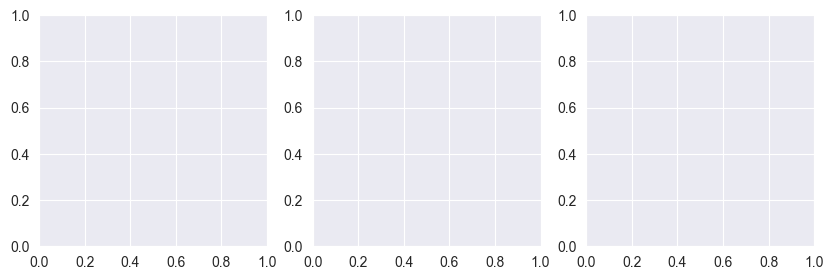

In [88]:
# this is how default subplots looks like 
figure, axis = plt.subplots(1, 3, figsize=(10, 3))

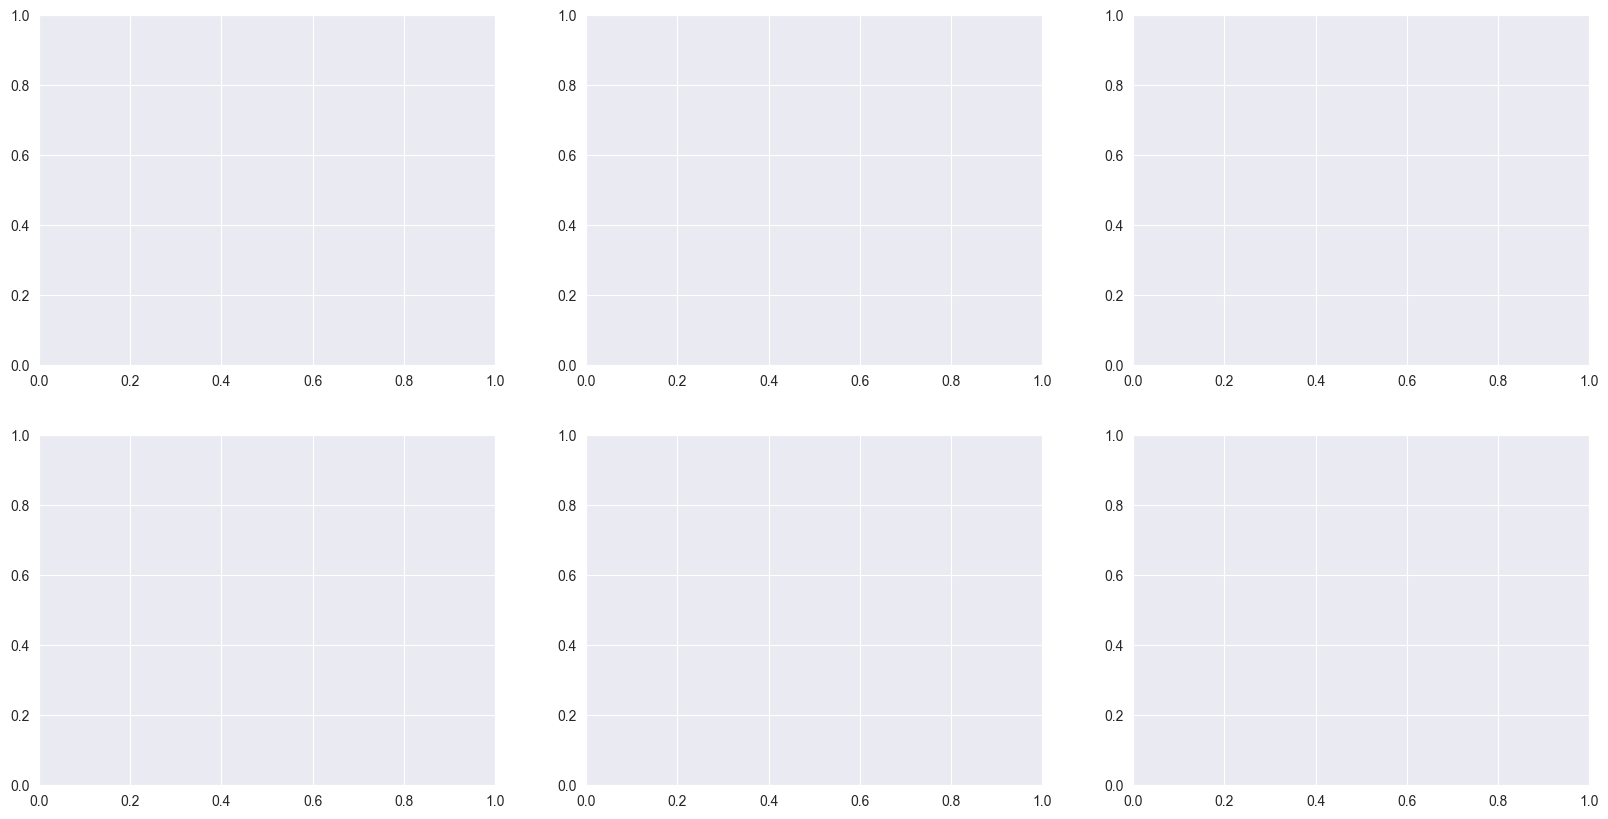

In [ ]:
# i can also make more rows (looks like np.arrays)
figure, axis = plt.subplots(2, 3, figsize=(20, 10))
# when using 2d arrays when u=im writing code for charts i need to write axex like this [0, 0], because now i have
# 2 dimensions